In [196]:
# %pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn
# Install missing modules
# Ensure matplotlib is installed and updated
# %pip install --upgrade matplotlib

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import auc,accuracy_score, classification_report, confusion_matrix,roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [198]:
df = pd.read_csv('DATA/SBAnational.csv')

C:\Users\samsu\AppData\Local\Temp\ipykernel_6996\936256926.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('DATA/SBAnational.csv')


In [199]:
# Examine the shape of the DataFrame
print(f"DataFrame shape: {df.shape}")

# View the first few rows
df.head()

# Check the data types of each column
df.info()

# Calculate basic descriptive statistics for numerical columns
df.describe()

# Identify missing values
df.isnull().sum()

DataFrame shape: (899164, 27)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312760,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [200]:
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [201]:
SBA = df.copy()

In [202]:
#MIS_Status
# "MIS_Status"

# Borrower Information
# 'Name', 'City','State','Zip', 'NAICS','NoEmp','NewExist','CreateJob','RetainedJob','FranchiseCode', 'UrbanRural'

# Lender Information
# 'Bank', 'BankState'

# Key Dates
# 'ApprovalDate','DisbursementDate','ChgOffDate'

# Loan unique identifier
# 'LoanNr_ChkDgt', 'ApprovalDate', 'ApprovalFY'

# Loan Financials
# 'Term', 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr','GrAppv','SBA_Appv'

# Loan Type
# 'RevLineCr', 'LowDoc'

MIS_Status
P I F     739609
CHGOFF    157558
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='MIS_Status', ylabel='count'>

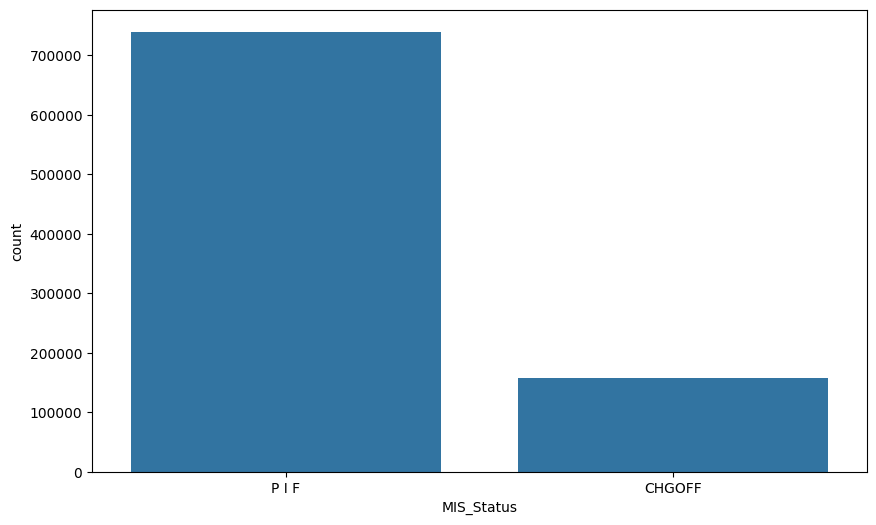

In [203]:
df['MIS_Status'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data = df, x = 'MIS_Status')
plt.show()

In [204]:
# Calculate the percentage of each class
mis_status_counts = df['MIS_Status'].value_counts()
mis_status_percentages = (mis_status_counts / len(df)) * 100

print(f"MIS_Status counts:\n{mis_status_counts}")
print(f"\nMIS_Status percentages:\n{mis_status_percentages}")

# Determine if the data is balanced based on a threshold (e.g., 80/20 split)
threshold = 20
is_balanced = all(percentage > (100 - threshold) / 2 and percentage < (100 + threshold) / 2 for percentage in mis_status_percentages)

if is_balanced:
    print("\nThe data is considered balanced.")
else:
    print("\nThe data is imbalanced.")


MIS_Status counts:
MIS_Status
P I F     739609
CHGOFF    157558
Name: count, dtype: int64

MIS_Status percentages:
MIS_Status
P I F     82.255184
CHGOFF    17.522721
Name: count, dtype: float64

The data is imbalanced.


In [205]:
for column in ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']:
  if df[column].dtype == object:
    df[column] = pd.to_numeric(df[column].str.replace('$', '', regex=False).str.replace(',', '', regex=False), errors='coerce')
  else:
    df[column] = pd.to_numeric(df[column], errors='coerce')

df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,60000.0,0.0,P I F,0.0,60000.0,48000.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,40000.0,0.0,P I F,0.0,40000.0,32000.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,287000.0,0.0,P I F,0.0,287000.0,215250.0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,35000.0,0.0,P I F,0.0,35000.0,28000.0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,229000.0,0.0,P I F,0.0,229000.0,229000.0


In [206]:
# Convert 'ApprovalDate' and 'DisbursementDate' to datetime objects
for col in ['ApprovalDate', 'DisbursementDate','ChgOffDate']:
    df[col] = pd.to_datetime(df[col], format='%d-%b-%y', errors='coerce')
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,...,N,Y,NaT,1999-02-28,60000.0,0.0,P I F,0.0,60000.0,48000.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,...,N,Y,NaT,1997-05-31,40000.0,0.0,P I F,0.0,40000.0,32000.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,...,N,N,NaT,1997-12-31,287000.0,0.0,P I F,0.0,287000.0,215250.0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,...,N,Y,NaT,1997-06-30,35000.0,0.0,P I F,0.0,35000.0,28000.0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,...,N,N,NaT,1997-05-14,229000.0,0.0,P I F,0.0,229000.0,229000.0


In [207]:
df['ApprovalFY'].apply(type).value_counts()
df['ApprovalFY'] = df['ApprovalFY'].astype(str).str.strip()

# Create a function to apply formatting to the records of str type only
def clean_str(x):
    if isinstance(x, str):
        return x.replace('A', '')
    return x
df['ApprovalFY'] = pd.to_numeric(df['ApprovalFY'], errors='coerce').fillna(-1).astype('int64')

df['ApprovalFY'].unique()

ApprovalFY
<class 'int'>    768092
<class 'str'>    131072
Name: count, dtype: int64

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1962, 1982, 1965, 1966, 1983, 1973, 1984, 2007,
       1985, 1986, 1987, 2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010,
       1967, 2011, 1992, 1993, 2002, 2012, 2013, 1994, 2014, 1975, 1977,
       1976, 1968,   -1, 1969, 1995, 1970, 1996, 1971])

In [208]:
df['Zip'] = df['Zip'].astype(str)
df['Zip'].dtype
df['Zip'].unique()

dtype('O')

array(['47711', '46526', '47401', ..., '70036', '66549', '26134'],
      shape=(33611,), dtype=object)

In [209]:
print(df['ChgOffDate'].isnull().sum())
print(df['ChgOffDate'].isnull().sum()/len(df)*100)

736465
81.90552557709161


In [210]:
#Mapping the code to the industry category
naics_sector_map = {
    0: "Unknown",
    11: "Agriculture, forestry, fishing and hunting",
    21: "Mining, quarrying, and oil and gas extraction",
    22: "Utilities",
    23: "Construction",
    31: "Manufacturing",
    32: "Manufacturing",
    33: "Manufacturing",
    42: "Wholesale trade",
    44: "Retail trade",
    45: "Retail trade",
    48: "Transportation and warehousing",
    49: "Transportation and warehousing",
    51: "Information",
    52: "Finance and insurance",
    53: "Real estate and rental and leasing",
    54: "Professional, scientific, and technical services",
    55: "Management of companies and enterprises",
    56: "Administrative and support and waste management and remediation services",
    61: "Educational services",
    62: "Health care and social assistance",
    71: "Arts, entertainment, and recreation",
    72: "Accommodation and food services",
    81: "Other services (except public administration)",
    92: "Public administration"
}

# Ensure NAICS is a string to safely slice
df['NAICS_2'] = df['NAICS'].astype(str).str[:2].astype(int)

# Map to sector
df['Sector'] = df['NAICS_2'].map(naics_sector_map)

In [211]:
numerical_columns = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
categorical_columns = ['Name', 'City', 'State', 'Bank', 'BankState', 'Sector','UrbanRural', 'LowDoc', 'RevLineCr', 'MIS_Status', 'NewExist']

<Figure size 800x600 with 0 Axes>

(array([7.64856e+05, 8.94720e+04, 2.84080e+04, 1.04420e+04, 3.20700e+03,
        2.06100e+03, 2.42000e+02, 1.60000e+02, 7.40000e+01, 6.70000e+01,
        6.70000e+01, 3.10000e+01, 2.10000e+01, 3.70000e+01, 3.00000e+00,
        1.00000e+00, 2.00000e+00, 2.00000e+00, 0.00000e+00, 2.00000e+00,
        2.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([       0.        ,   381544.16666667,   763088.33333333,
         1144632.5       ,  1526176.66666667,  1907720.83333333,
         2289265.        ,  2670809.16666667,  3052353.33333333,
         3433897.5       ,  3815441.66666667,  4196985.83333333,
         4578530.        ,  4960074.16666667,  5341618.33333333,
         5723162.5       ,  6104706.66666667,  6486250.83333333,
         6867795.        ,  7249339.16666667,  7630883.33333333,
         8012427.5       ,  8393971.66666667,  8775515.83333333,
         9157060.        ,  9538604.1666

Text(0.5, 0, 'DisbursementGross')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of DisbursementGross')

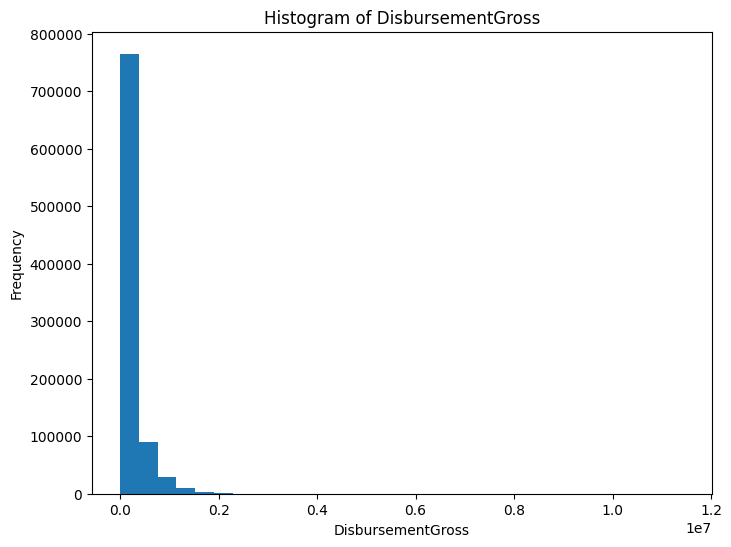

<Figure size 800x600 with 0 Axes>

(array([8.99155e+05, 3.00000e+00, 2.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([     0.        ,  33208.73333333,  66417.46666667,  99626.2       ,
        132834.93333333, 166043.66666667, 199252.4       , 232461.13333333,
        265669.86666667, 298878.6       , 332087.33333333, 365296.06666667,
        398504.8       , 431713.53333333, 464922.26666667, 498131.        ,
        531339.73333333, 564548.46666667, 597757.2       , 630965.93333333,
        664174.66666667, 697383.4       , 730592.13333333, 763800.86666667,
        797009.6       , 830218.33333333, 863427.06666667, 896635.8       ,
        929844.53333333, 963

Text(0.5, 0, 'BalanceGross')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of BalanceGross')

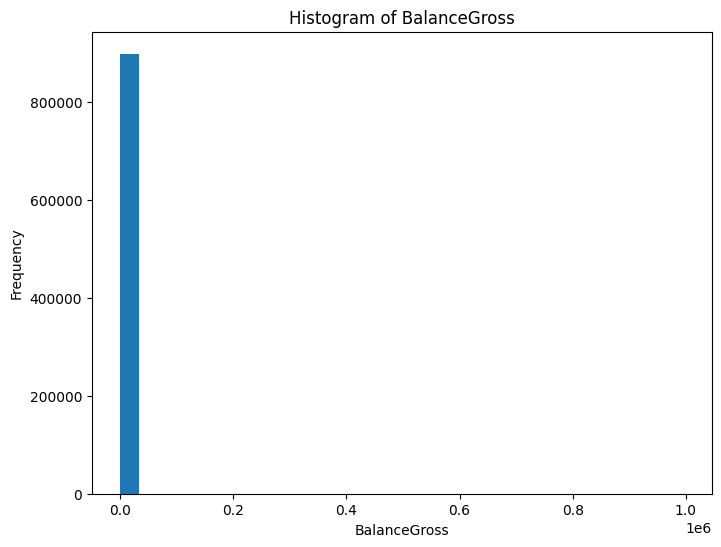

<Figure size 800x600 with 0 Axes>

(array([8.75161e+05, 1.27460e+04, 4.97400e+03, 2.41200e+03, 1.35000e+03,
        7.77000e+02, 5.42000e+02, 4.12000e+02, 2.77000e+02, 1.40000e+02,
        1.19000e+02, 8.40000e+01, 6.20000e+01, 4.30000e+01, 2.90000e+01,
        2.10000e+01, 1.10000e+01, 1.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([      0.        ,  117086.53333333,  234173.06666667,
         351259.6       ,  468346.13333333,  585432.66666667,
         702519.2       ,  819605.73333333,  936692.26666667,
        1053778.8       , 1170865.33333333, 1287951.86666667,
        1405038.4       , 1522124.93333333, 1639211.46666667,
        1756298.        , 1873384.53333333, 1990471.06666667,
        2107557.6       , 2224644.13333333, 2341730.66666667,
        2458817.2       , 2575903.73333333, 2692990.26666667,
        2810076.8       , 2927163.33333333, 3044249.86666667,
  

Text(0.5, 0, 'ChgOffPrinGr')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of ChgOffPrinGr')

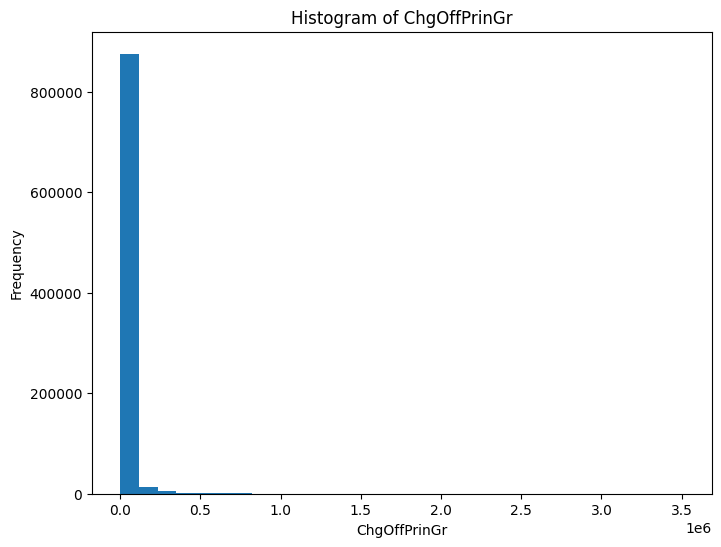

<Figure size 800x600 with 0 Axes>

(array([6.32691e+05, 1.30666e+05, 5.70280e+04, 2.87440e+04, 1.87030e+04,
        1.34130e+04, 5.92300e+03, 4.71700e+03, 2.67400e+03, 1.46400e+03,
        2.40000e+03, 1.07000e+02, 1.09000e+02, 1.24000e+02, 5.60000e+01,
        4.60000e+01, 6.70000e+01, 2.50000e+01, 2.50000e+01, 3.60000e+01,
        1.60000e+01, 3.90000e+01, 9.00000e+00, 1.30000e+01, 1.10000e+01,
        6.00000e+00, 9.00000e+00, 4.20000e+01, 0.00000e+00, 1.00000e+00]),
 array([2.00000000e+02, 1.82593333e+05, 3.64986667e+05, 5.47380000e+05,
        7.29773333e+05, 9.12166667e+05, 1.09456000e+06, 1.27695333e+06,
        1.45934667e+06, 1.64174000e+06, 1.82413333e+06, 2.00652667e+06,
        2.18892000e+06, 2.37131333e+06, 2.55370667e+06, 2.73610000e+06,
        2.91849333e+06, 3.10088667e+06, 3.28328000e+06, 3.46567333e+06,
        3.64806667e+06, 3.83046000e+06, 4.01285333e+06, 4.19524667e+06,
        4.37764000e+06, 4.56003333e+06, 4.74242667e+06, 4.92482000e+06,
        5.10721333e+06, 5.28960667e+06, 5.47200000e+06])

Text(0.5, 0, 'GrAppv')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of GrAppv')

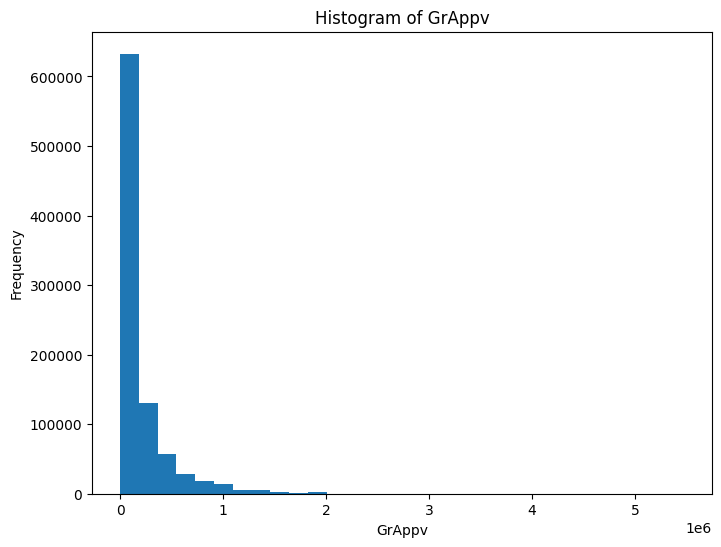

<Figure size 800x600 with 0 Axes>

(array([6.8267e+05, 1.1061e+05, 4.8836e+04, 2.3314e+04, 1.8593e+04,
        7.7950e+03, 2.2150e+03, 2.0750e+03, 1.7430e+03, 3.2700e+02,
        5.1200e+02, 6.6000e+01, 8.6000e+01, 4.4000e+01, 5.3000e+01,
        3.1000e+01, 3.0000e+01, 3.0000e+01, 1.9000e+01, 3.3000e+01,
        2.8000e+01, 2.0000e+01, 4.0000e+00, 1.0000e+00, 2.5000e+01,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00000000e+02, 1.82496667e+05, 3.64893333e+05, 5.47290000e+05,
        7.29686667e+05, 9.12083333e+05, 1.09448000e+06, 1.27687667e+06,
        1.45927333e+06, 1.64167000e+06, 1.82406667e+06, 2.00646333e+06,
        2.18886000e+06, 2.37125667e+06, 2.55365333e+06, 2.73605000e+06,
        2.91844667e+06, 3.10084333e+06, 3.28324000e+06, 3.46563667e+06,
        3.64803333e+06, 3.83043000e+06, 4.01282667e+06, 4.19522333e+06,
        4.37762000e+06, 4.56001667e+06, 4.74241333e+06, 4.92481000e+06,
        5.10720667e+06, 5.28960333e+06, 5.47200000e+06]),
 <BarContainer object of 30 

Text(0.5, 0, 'SBA_Appv')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of SBA_Appv')

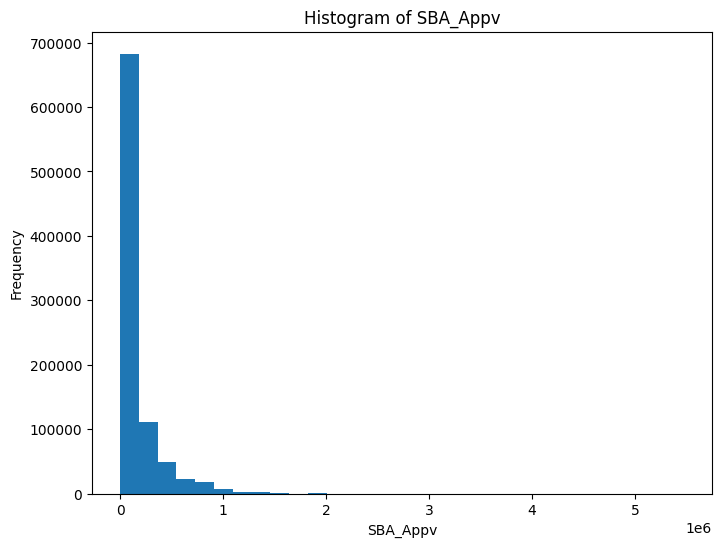

In [212]:
for column in numerical_columns:
  plt.figure(figsize=(8, 6))
  plt.hist(df[column], bins=30)
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.title(f"Histogram of {column}")
  plt.show()

In [213]:
for col in ['LowDoc', 'RevLineCr']:
    df[col] = df[col].apply(lambda x: x if x in ['Y', 'N'] else np.nan)

df.info()
for col in ['LowDoc', 'RevLineCr']:
    df[col].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      899164 non-null  int64         
 1   Name               899150 non-null  object        
 2   City               899134 non-null  object        
 3   State              899150 non-null  object        
 4   Zip                899164 non-null  object        
 5   Bank               897605 non-null  object        
 6   BankState          897598 non-null  object        
 7   NAICS              899164 non-null  int64         
 8   ApprovalDate       899164 non-null  datetime64[ns]
 9   ApprovalFY         899164 non-null  int64         
 10  Term               899164 non-null  int64         
 11  NoEmp              899164 non-null  int64         
 12  NewExist           899028 non-null  float64       
 13  CreateJob          899164 non-null  int64   

LowDoc
N    782822
Y    110335
Name: count, dtype: int64

RevLineCr
N    420288
Y    201397
Name: count, dtype: int64

In [214]:
df['UrbanRural'] = df['UrbanRural'].replace(0, np.nan)
df['UrbanRural'].value_counts()

UrbanRural
1.0    470654
2.0    105343
Name: count, dtype: int64

In [215]:
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural           323167
RevLineCr            277479
LowDoc                 6007
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
NAICS_2                   0
Sector                    0
dtype: int64

**DESCRIPTIVE ANALYSIS**

In [216]:
SBA[['ApprovalDate', 'ChgOffDate', 'DisbursementDate']] = SBA[['ApprovalDate', 'ChgOffDate', 'DisbursementDate']].apply(pd.to_datetime, errors='coerce')

# Format currency columns
currency_cols = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
for col in currency_cols:
    SBA[col] = SBA[col].str.replace('[$,]', '', regex=True).astype(float)

# Correct integer columns
cols = ['Term', 'NoEmp', 'CreateJob', 'RetainedJob']
SBA[cols] = SBA[cols].apply(lambda col: col.str.strip() if col.dtype == 'object' else col)
SBA[cols] = SBA[cols].apply(pd.to_numeric, errors='coerce')

# Correct year columns
SBA['ApprovalFY'] = SBA['ApprovalFY'].replace('1976A', 1976)
SBA['ApprovalFY'] = SBA['ApprovalFY'].astype(int)

C:\Users\samsu\AppData\Local\Temp\ipykernel_6996\1796583053.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  SBA[['ApprovalDate', 'ChgOffDate', 'DisbursementDate']] = SBA[['ApprovalDate', 'ChgOffDate', 'DisbursementDate']].apply(pd.to_datetime, errors='coerce')
C:\Users\samsu\AppData\Local\Temp\ipykernel_6996\1796583053.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  SBA[['ApprovalDate', 'ChgOffDate', 'DisbursementDate']] = SBA[['ApprovalDate', 'ChgOffDate', 'DisbursementDate']].apply(pd.to_datetime, errors='coerce')
C:\Users\samsu\AppData\Local\Temp\ipykernel_6996\1796583053.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure pars

In [217]:
SBA['MIS_Status'] = SBA['MIS_Status'].map({'CHGOFF': 1, 'P I F': 0})


In [218]:
SBA.fillna({
    'Name': 'Unknown',
    'City': 'Unknown',
    'State': 'Unknown',
    'Bank': 'Unknown',
    'RevLineCr': 'Unknown',
    'LowDoc': 'Unknown',
    'BankState': 'UN'
}, inplace=True)

# Handle DisbursementDate separately since it uses another column’s value
SBA['DisbursementDate'].fillna(SBA['ApprovalDate'], inplace=True)

# Drop NA in NewExist column
SBA.dropna(subset=['NewExist'], inplace=True)

C:\Users\samsu\AppData\Local\Temp\ipykernel_6996\395804656.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  SBA['DisbursementDate'].fillna(SBA['ApprovalDate'], inplace=True)


i. What is the distribution of loans (DisbursementGross) across industries (NAICS)?

In [219]:
print(SBA['DisbursementGross'].dtype)
#Mapping the code to the industry category
naics_sector_map = {
    0: "Unknown",
    11: "Agriculture, forestry, fishing and hunting",
    21: "Mining, quarrying, and oil and gas extraction",
    22: "Utilities",
    23: "Construction",
    31: "Manufacturing",
    32: "Manufacturing",
    33: "Manufacturing",
    42: "Wholesale trade",
    44: "Retail trade",
    45: "Retail trade",
    48: "Transportation and warehousing",
    49: "Transportation and warehousing",
    51: "Information",
    52: "Finance and insurance",
    53: "Real estate and rental and leasing",
    54: "Professional, scientific, and technical services",
    55: "Management of companies and enterprises",
    56: "Administrative and support and waste management and remediation services",
    61: "Educational services",
    62: "Health care and social assistance",
    71: "Arts, entertainment, and recreation",
    72: "Accommodation and food services",
    81: "Other services (except public administration)",
    92: "Public administration"
}
# Ensure NAICS is a string to safely slice
SBA['NAICS_2'] = SBA['NAICS'].astype(str).str[:2].astype(int)

# Map to sector
SBA['Sector'] = SBA['NAICS_2'].map(naics_sector_map)
SBA[['Sector']].value_counts()

float64


Sector                                                                  
Unknown                                                                     201948
Retail trade                                                                127240
Other services (except public administration)                                72606
Professional, scientific, and technical services                             68155
Manufacturing                                                                68017
Accommodation and food services                                              67583
Construction                                                                 66632
Health care and social assistance                                            55349
Wholesale trade                                                              48734
Administrative and support and waste management and remediation services     32679
Transportation and warehousing                                               22527
Arts, entertai

<Axes: xlabel='Sector'>

Text(0.5, 1.0, 'Total Disbursement by Industry')

Text(0, 0.5, 'Disbursement Amount')

Text(0.5, 0, 'Sector')

C:\Users\samsu\AppData\Local\Temp\ipykernel_6996\721172157.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


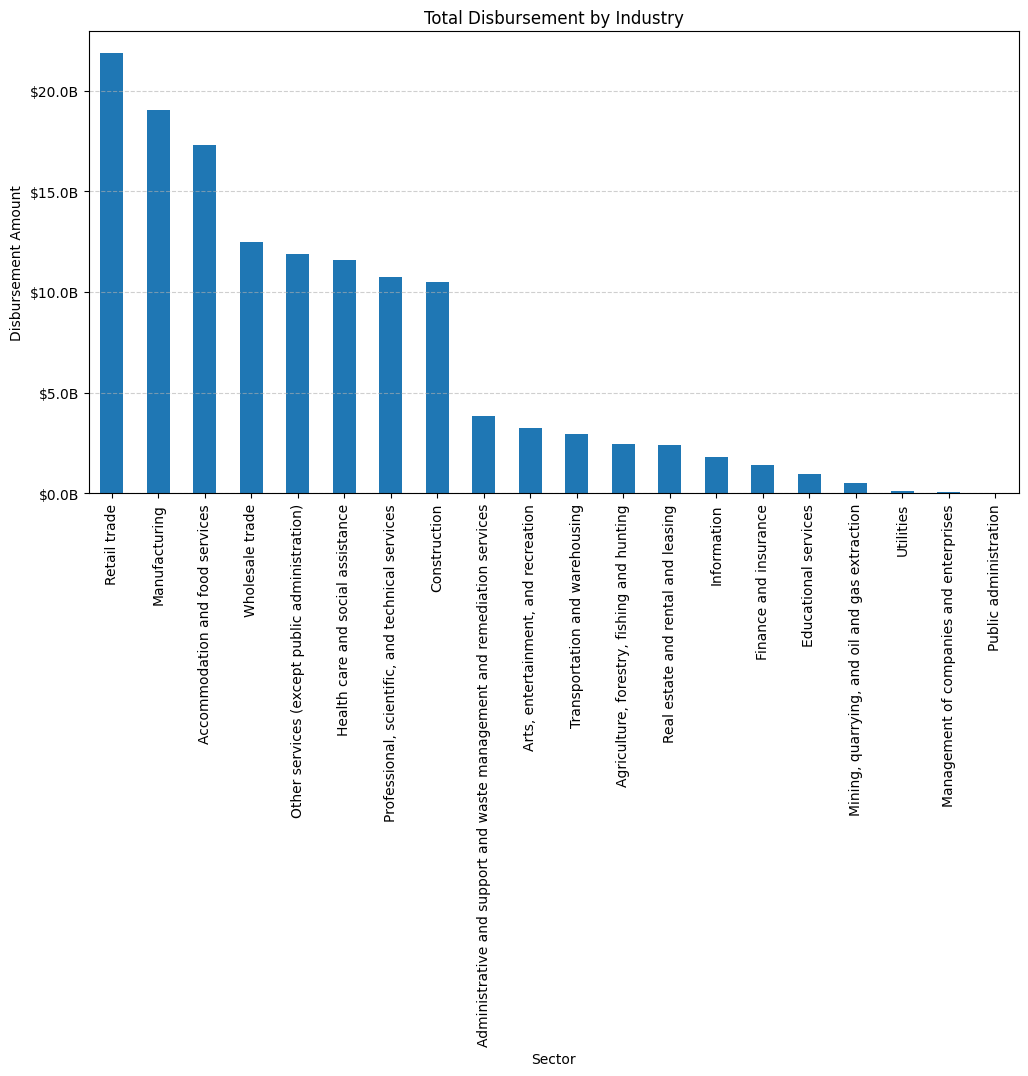

In [220]:
# Group and rescale by billions
sector_disbursement = SBA.groupby('Sector')['DisbursementGross'].sum() / 1000000000
sector_disbursement = sector_disbursement.drop('Unknown', errors='ignore').sort_values(ascending=False)
sector_disbursement.plot(kind='bar', figsize=(12, 6))

plt.title("Total Disbursement by Industry")
plt.ylabel("Disbursement Amount")
plt.xlabel("Sector")
formatter = ticker.FuncFormatter(lambda x, _: f'${x:,.1f}B')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [221]:
# Percentage makeup of top 3 industries
round((sector_disbursement[0]+sector_disbursement[1]+sector_disbursement[2])/sector_disbursement.sum()*100, 2)

C:\Users\samsu\AppData\Local\Temp\ipykernel_6996\2972341407.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  round((sector_disbursement[0]+sector_disbursement[1]+sector_disbursement[2])/sector_disbursement.sum()*100, 2)


np.float64(43.04)

ii. Which states (State) have the highest number of loans?

<Axes: xlabel='State'>

Text(0.5, 1.0, 'Total Loans by State')

Text(0, 0.5, 'Disbursement Amount')

Text(0.5, 0, 'State')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, 'CA'),
  Text(1, 0, 'TX'),
  Text(2, 0, 'NY'),
  Text(3, 0, 'FL'),
  Text(4, 0, 'PA'),
  Text(5, 0, 'OH'),
  Text(6, 0, 'IL'),
  Text(7, 0, 'MA'),
  Text(8, 0, 'MN'),
  Text(9, 0, 'NJ'),
  Text(10, 0, 'WA'),
  Text(11, 0, 'GA'),
  Text(12, 0, 'WI'),
  Text(13, 0, 'MO'),
  Text(14, 0, 'CO'),
  Text(15, 0, 'MI'),
  Text(16, 0, 'UT'),
  Text(17, 0, 'AZ'),
  Text(18, 0, 'NC'),
  Text(19, 0, 'IN'),
  Text(20, 0, 'MD'),
  Text(21, 0, 'VA'),
  Text(22, 0, 'CT'),
  Text(23, 0, 'NH'),
  Text(24, 0, 'IA'),
  Text(25, 0, 'KS'),
  Text(26, 0, 'OR'),
  Text(27, 0, 'OK'),
  Text(28, 0, 'LA'),
  Text(29, 0, 'ID'),
  Text(30, 0, 'TN'),
  Text(31, 0, 'RI'),
  Text(32, 0, 'MT'),
  Text(33, 0, 'AL'),
  Text(34, 0, 'NV'),
  Text(35, 0, 'KY'),
  Text(36, 0, 'MS'),
  T

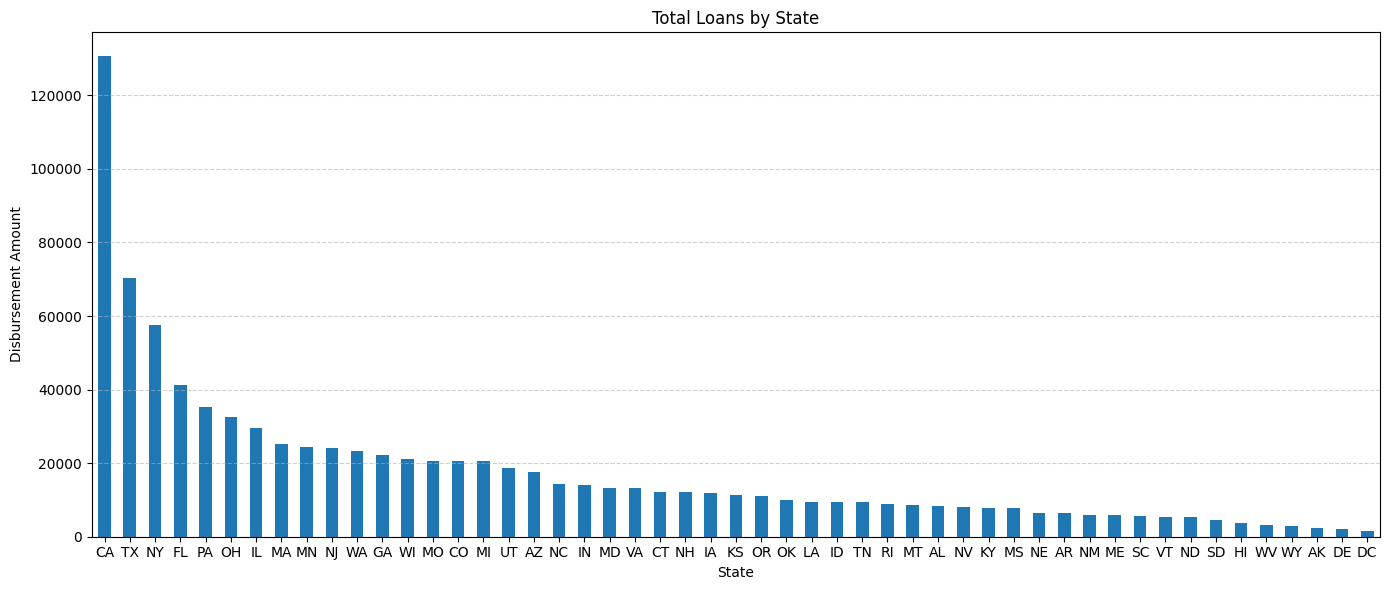

In [222]:
state_loans = SBA['State'].value_counts().drop('Unknown', errors='ignore').sort_values(ascending=False)

state_loans.plot(kind='bar', figsize=(14, 6))
plt.title("Total Loans by State")
plt.ylabel("Disbursement Amount")
plt.xlabel("State")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

iii. #Calculating percentage of loans are issued to urban vs. rural businesses

UrbanRural
Urban      52.339527
Unknown    35.946266
Rural      11.714207
Name: count, dtype: float64


<Axes: xlabel='UrbanRural'>

Text(0.5, 1.0, 'Percentage of Loans Issued to Urban vs. Rural Businesses')

Text(0, 0.5, 'Percentage')

Text(0.5, 0, '')

(array([0, 1, 2]),
 [Text(0, 0, 'Urban'), Text(1, 0, 'Unknown'), Text(2, 0, 'Rural')])

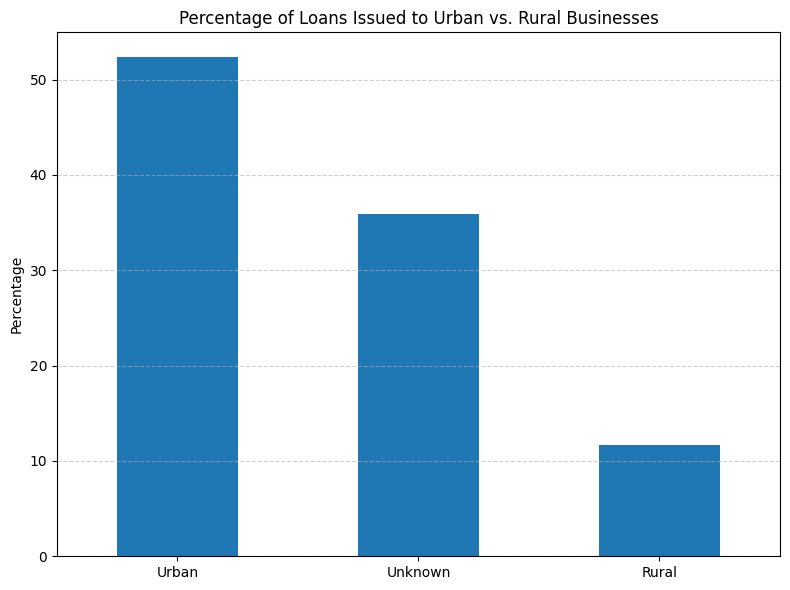

In [223]:
urban_rural_map = {0: 'Unknown', 1: 'Urban', 2: 'Rural'}
URLoan_percentage = SBA['UrbanRural'].map(urban_rural_map).value_counts()/len(SBA)* 100
print(URLoan_percentage)

# plotting the percentage of loans are issued to urban vs. rural businesses
URLoan_percentage.plot(kind='bar', figsize=(8, 6))
plt.title("Percentage of Loans Issued to Urban vs. Rural Businesses")
plt.ylabel("Percentage")
plt.xlabel("")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

iv. What is the average number of jobs created (CreateJob) across industries?

<Axes: xlabel='Sector'>

Text(0.5, 1.0, 'Average Number of Jobs Created per SBA Loan by Sector')

Text(0, 0.5, 'Average Jobs Created')

Text(0.5, 0, 'Sector')

C:\Users\samsu\AppData\Local\Temp\ipykernel_6996\1365587605.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


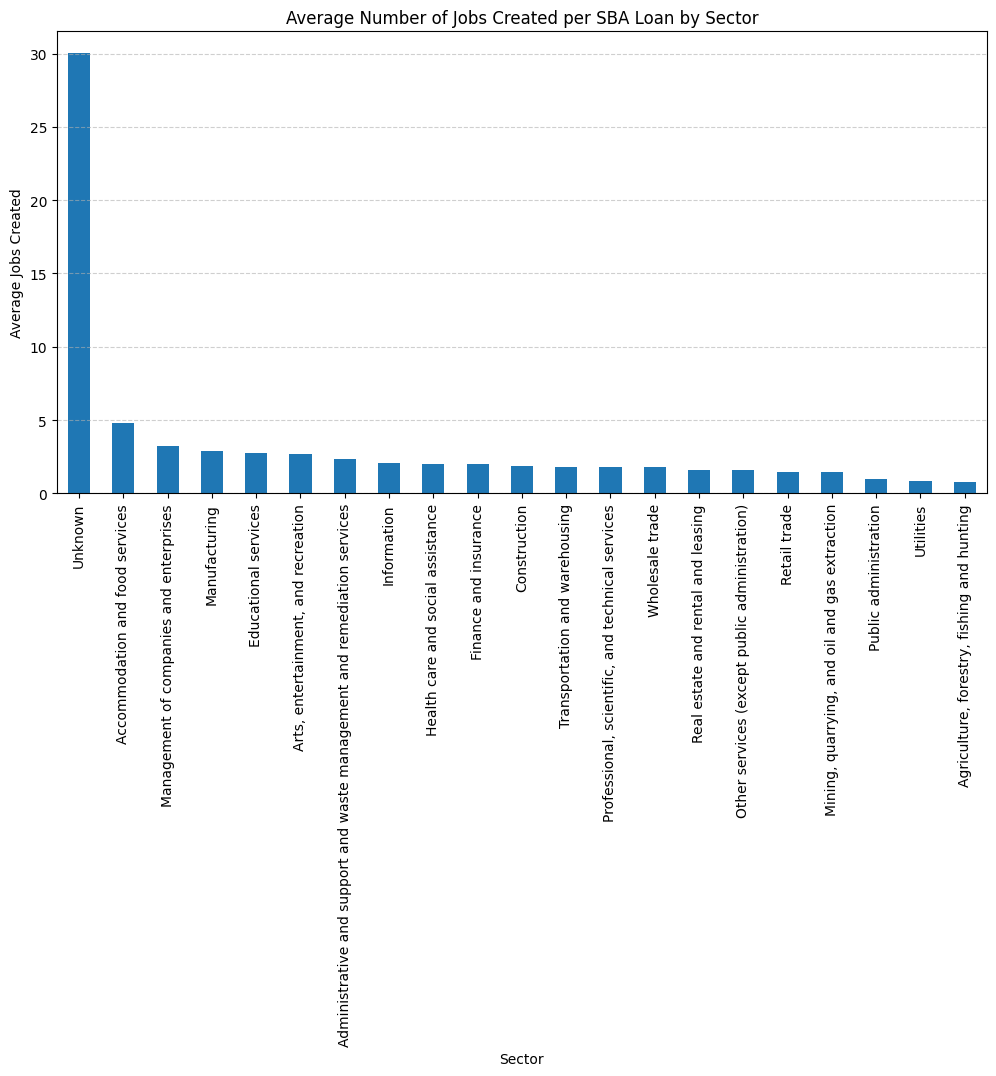

In [224]:
# Calculating average number of jobs created (CreateJob) across industries
SBA.groupby('Sector')['CreateJob'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))

plt.title("Average Number of Jobs Created per SBA Loan by Sector")
plt.ylabel("Average Jobs Created")
plt.xlabel("Sector")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Most of job created is in industry which is not clearly determined. Second most job created is in Accomodation and food services.

v. How does the default rate (MIS_Status) vary across industries and regions?

<Axes: xlabel='Sector'>

Text(0.5, 1.0, 'Average Loan Default Rate by Industry Sector')

Text(0, 0.5, 'Default Rate')

Text(0.5, 0, 'Sector')

C:\Users\samsu\AppData\Local\Temp\ipykernel_6996\3064750077.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


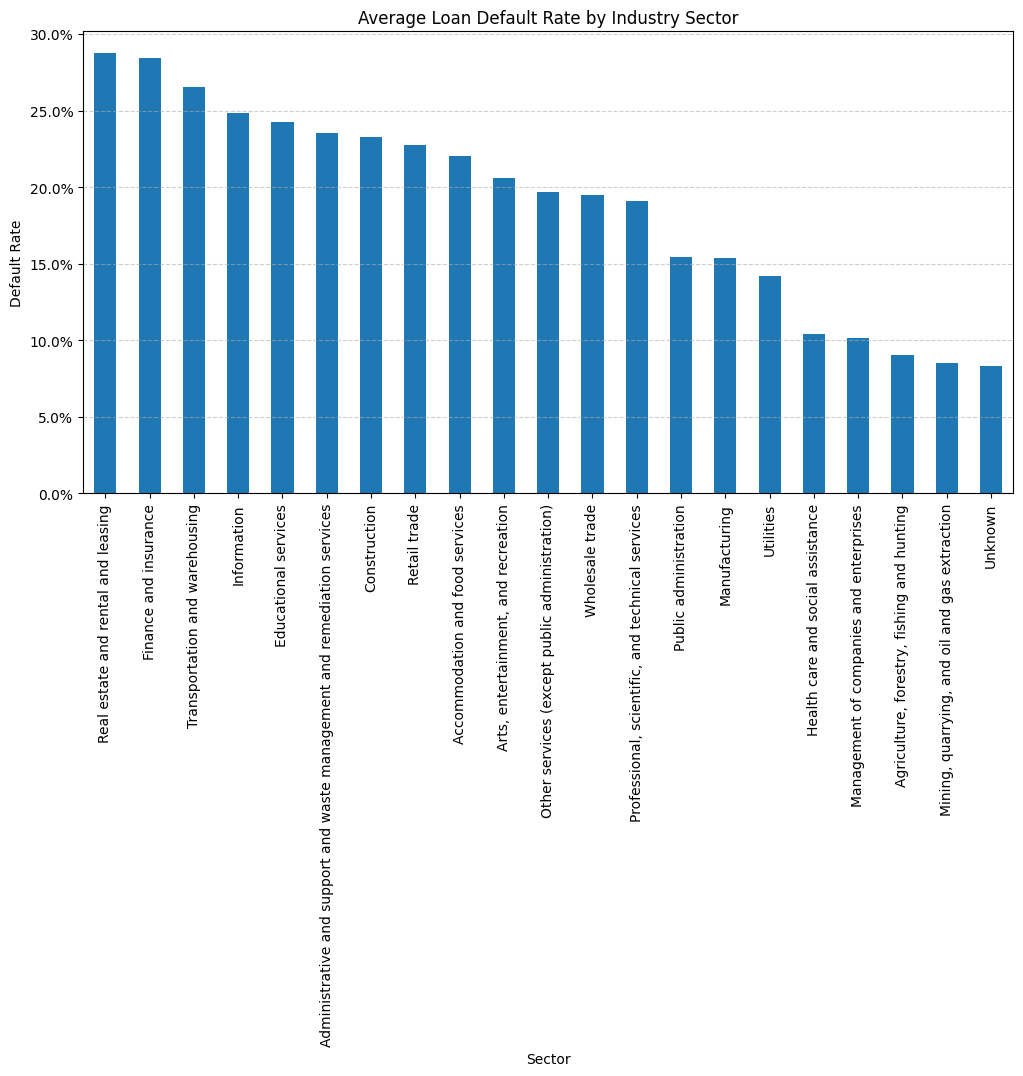

In [225]:
# Calculating default rate (MIS_Status) vary across industries and regions
default_rates = SBA.groupby('Sector')['MIS_Status'].mean().sort_values(ascending=False) * 100
default_rates.plot(kind='bar', figsize=(12, 6))

plt.title("Average Loan Default Rate by Industry Sector")
plt.ylabel("Default Rate")
plt.xlabel("Sector")
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Most default is observed in Real estate rental and leasing and Finance and Insurance. The least is observed in Mining, quarrying, and oil and gas extraction

vi. How has LowDoc program participation (LowDoc) changed over time?

In [226]:
# Check LowDoc values
print(SBA['LowDoc'].value_counts())
print(SBA['LowDoc'].count())

# Correct data entry errors, there should only be Y, N, and Unknown
valid_lowdoc = ['Y', 'N', 'Unknown']
SBA['LowDoc'] = SBA['LowDoc'].apply(lambda x: x if x in valid_lowdoc else 'Unknown')
print(SBA['LowDoc'].value_counts())
print(SBA['LowDoc'].count())

LowDoc
N          782690
Y          110335
Unknown      2579
0            1491
C             758
S             602
A             497
R              75
1               1
Name: count, dtype: int64
899028
LowDoc
N          782690
Y          110335
Unknown      6003
Name: count, dtype: int64
899028


Text(0.5, 1.0, 'Number of LowDoc Loans Over Time')

Text(0.5, 0, 'Approval Fiscal Year')

Text(0, 0.5, 'Number of Loans')

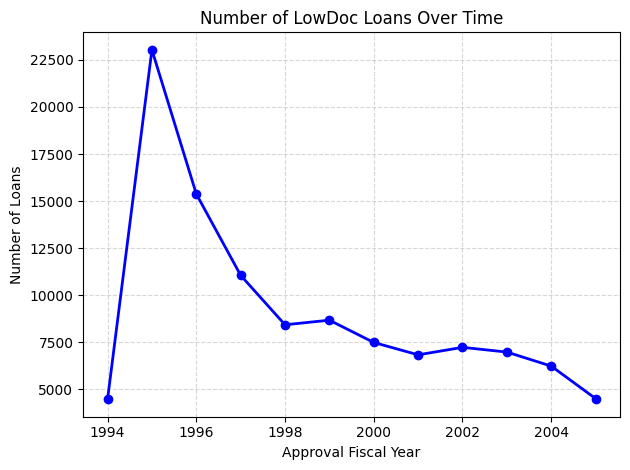

Text(0.5, 1.0, 'Average LowDoc Loan Amount Approved by Year')

Text(0.5, 0, 'Approval Fiscal Year')

Text(0, 0.5, 'Average Loan Amount (in thousands $)')

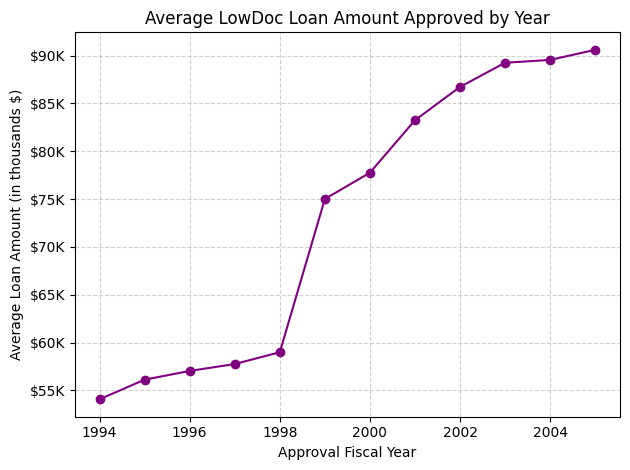

In [227]:
# Plot only loans that were lowdoc per year
lowdoc_yes = SBA[SBA['LowDoc'] == 'Y'].groupby('ApprovalFY').size().sort_index()

# Line chart depicting lowdoc loans per year
plt.plot(lowdoc_yes.index, lowdoc_yes.values, marker='o', linewidth=2, color='blue')
plt.title("Number of LowDoc Loans Over Time")
plt.xlabel("Approval Fiscal Year")
plt.ylabel("Number of Loans")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Filter only LowDoc = 'Y' loans while keeping other columns
lowdoc_loans = SBA[SBA['LowDoc'] == 'Y']

# Group by year and sum loan amounts
lowdoc_amounts_by_year = lowdoc_loans.groupby('ApprovalFY')['GrAppv'].sum().sort_index()

# Find average lowdoc loan amount approved per year
avg_loan_amt_by_year = lowdoc_amounts_by_year / lowdoc_yes

# Plot average loan amount per year
plt.plot(avg_loan_amt_by_year.index, avg_loan_amt_by_year.values, marker='o', color='purple')
plt.title("Average LowDoc Loan Amount Approved by Year")
plt.xlabel("Approval Fiscal Year")
plt.ylabel("Average Loan Amount (in thousands $)")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x/1_000:,.0f}K'))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The first graph highlights a sharp decline in the number of low documentation loans issued after peaking in 1995, suggesting a decrease in the program’s popularity or availability over time. In contrast, the second chart reveals that the average approved loan amount steadily increased throughout the same period, rising from approximately $55,000 in 1994 to over $90,000 by 2005. Even adjusted for inflation, there was an increase in the average loan amount approved per year.

This indicates that although fewer low documentation loans were approved over time, the SBA issued larger loan amounts on average, potentially reflecting changes in borrower profiles, loan limits, or program structure.

vii. What is the correlation between loan term (Term) and default rate?

In [228]:
# calculating correlation between loan term (Term) and default rate
SBA['Term'].corr(SBA['MIS_Status'])

np.float64(-0.3141514417440699)

The loan term is negatively correlated with MIS_Status. As the term increase, the load in less default.

viii. How many jobs are created per $1M disbursed (DisbursementGross)?

<Axes: ylabel='Frequency'>

Text(0.5, 1.0, 'Distribution of Jobs per Disbursement')

Text(0.5, 0, 'Jobs per Disbursement')

Text(0, 0.5, 'Frequency')

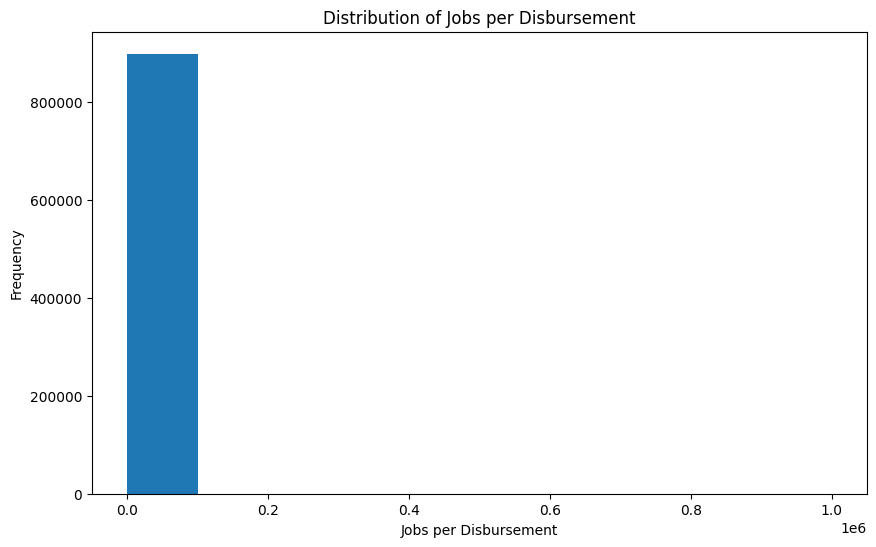

In [229]:
SBA['Jobs_per_Disbursement'] = SBA['CreateJob'] / (SBA['DisbursementGross'] / 1000000)
valid_data = SBA['Jobs_per_Disbursement'].replace([np.inf, -np.inf], np.nan).dropna()
valid_data.plot(kind='hist', bins=10, figsize=(10, 6))
plt.title("Distribution of Jobs per Disbursement")
plt.xlabel("Jobs per Disbursement")
plt.ylabel("Frequency")
plt.show()

<Axes: ylabel='Frequency'>

Text(0.5, 1.0, 'Log-Scaled Distribution of Jobs per Disbursement')

Text(0.5, 0, 'Jobs per Disbursement (log scale)')

Text(0, 0.5, 'Frequency')

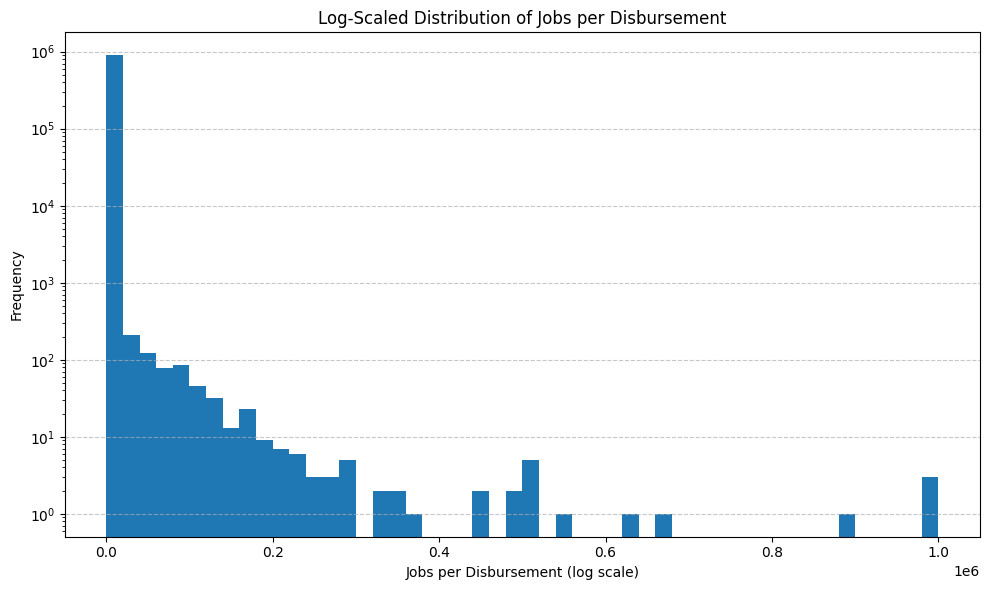

In [230]:
# Focus on the 99th percentile
threshold = valid_data.quantile(0.99)
filtered_data = valid_data[valid_data <= threshold]

valid_data.plot(kind='hist', bins=50, log=True, figsize=(10, 6))
plt.title("Log-Scaled Distribution of Jobs per Disbursement")
plt.xlabel("Jobs per Disbursement (log scale)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The vast majority of businesses fall within the 0.0 to 0.2 range.

That means most loans result in less than 0.2 jobs per $1 million disbursed.

Most SBA loans create less than 1 job per $1 million disbursed.

The majority cluster around 0.1–0.2, suggesting low job creation efficiency per dollar.

A small number of businesses achieve high job-per-dollar ratios, but they are outliers.

ix. What is the average SBA guarantee ratio (SBA_Appv / GrAppv) across industries?

<Axes: xlabel='Sector'>

Text(0.5, 1.0, 'Average SBA Guarantee Ratio by Industry')

Text(0, 0.5, 'Average SBA Guarantee Ratio')

Text(0.5, 0, 'Sector')

C:\Users\samsu\AppData\Local\Temp\ipykernel_6996\378741373.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


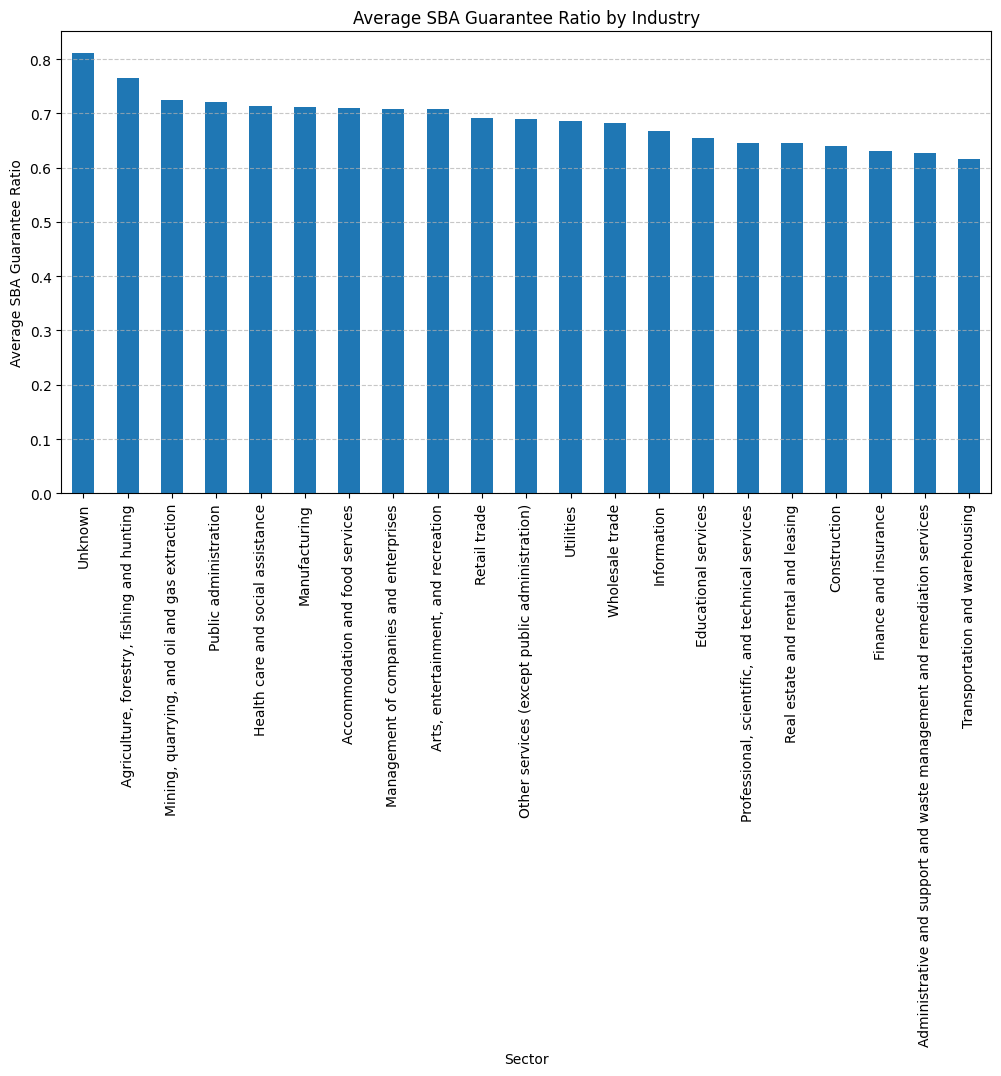

In [231]:
# Calculating the average SBA guarantee ratio (SBA_Appv / GrAppv) across industries
SBA['SBA_Guarantee_Ratio'] = SBA['SBA_Appv'] / SBA['GrAppv']
SBA.groupby('Sector')['SBA_Guarantee_Ratio'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title("Average SBA Guarantee Ratio by Industry")
plt.ylabel("Average SBA Guarantee Ratio")
plt.xlabel("Sector")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Agriculture, mining, and public administration show high guarantee ratios (~0.75 to 0.8). These industries likely represent higher-risk or underserved sectors, where the SBA steps in to guarantee a larger portion of the loan to encourage lending.

Healthcare, Retail, Food services, Manufacturing are mid-range established industry with moderate SBA guarantees.

Transportation and warehousing, finance, real estate, and admin support show lower average SBA guarantees. It may be due to lower default risk.

x. Which banks (Bank) have the highest charge-off amounts (ChgOffPrinGr)?

<Axes: xlabel='Bank'>

Text(0.5, 1.0, 'Top 10 Total Charge-Off Amounts by Bank')

Text(0, 0.5, 'Charge-Off Amount')

Text(0.5, 0, 'Bank')

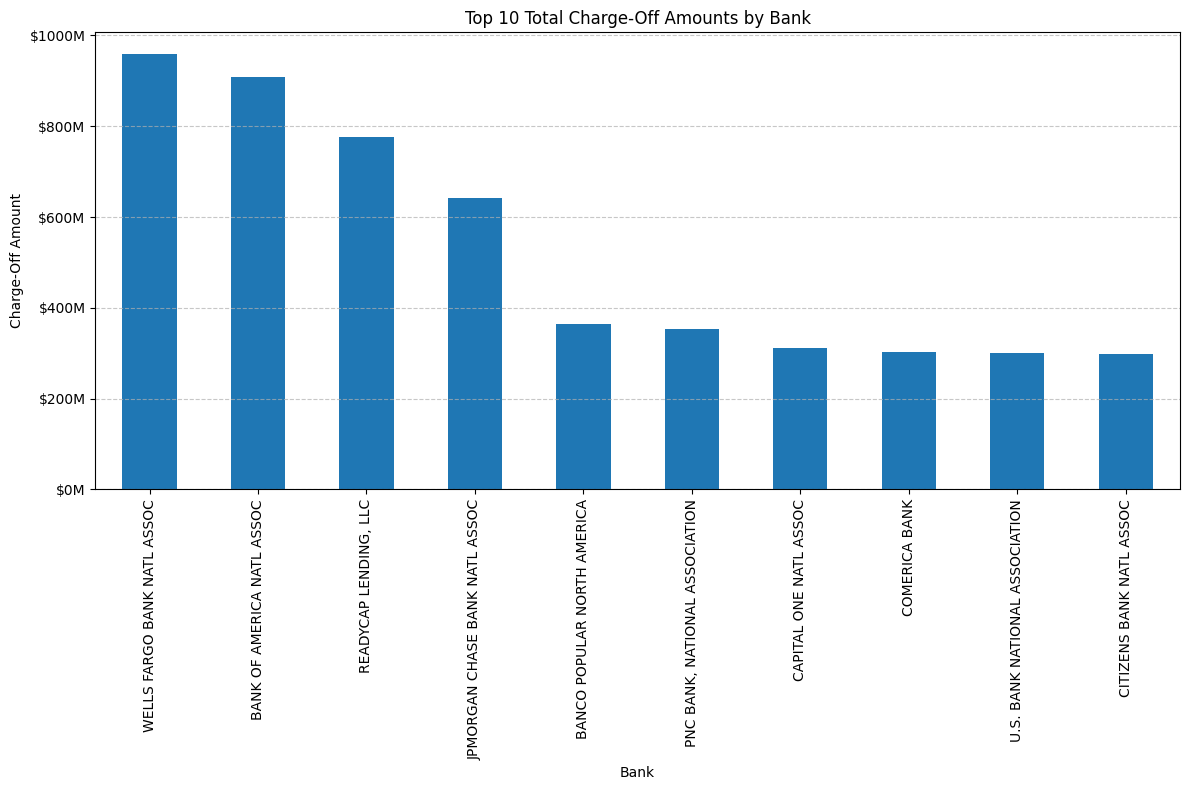

In [232]:
# Calculating banks (Bank) have the highest charge-off amounts (ChgOffPrinGr)
top_banks = SBA.groupby('Bank')['ChgOffPrinGr'].sum().sort_values(ascending=False).head(10) / 1000000
top_banks.plot(kind='bar', figsize=(12, 8))
plt.title("Top 10 Total Charge-Off Amounts by Bank")
plt.ylabel("Charge-Off Amount")
plt.xlabel("Bank")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:.0f}M'))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

WELLS Fargo has the highest charge-off amounts. Bank of America is in the second.

In [233]:
df = df.dropna()
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform categorical columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [234]:
# Assuming 'numerical_columns' is defined as in the previous code
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col + '_log'] = round(np.log1p(df[col]),3)

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97186 entries, 67 to 898240
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   LoanNr_ChkDgt          97186 non-null  int64         
 1   Name                   97186 non-null  int64         
 2   City                   97186 non-null  int64         
 3   State                  97186 non-null  int64         
 4   Zip                    97186 non-null  object        
 5   Bank                   97186 non-null  int64         
 6   BankState              97186 non-null  int64         
 7   NAICS                  97186 non-null  int64         
 8   ApprovalDate           97186 non-null  datetime64[ns]
 9   ApprovalFY             97186 non-null  int64         
 10  Term                   97186 non-null  int64         
 11  NoEmp                  97186 non-null  int64         
 12  NewExist               97186 non-null  int64         
 13  Crea

In [236]:
# Calculate correlations between all columns and 'MIS_Status'
correlations = df.corr()['MIS_Status'].sort_values(ascending=False)

correlations

MIS_Status               1.000000
NewExist                 0.026774
NAICS                    0.012865
NAICS_2                  0.012852
ChgOffDate               0.001611
State                    0.001359
Name                     0.000393
City                    -0.000122
RetainedJob             -0.003166
LowDoc                  -0.004323
Sector                  -0.004399
NoEmp                   -0.005375
CreateJob               -0.005585
FranchiseCode           -0.006206
RevLineCr               -0.007196
UrbanRural              -0.010534
ApprovalFY              -0.012067
ApprovalDate            -0.013290
DisbursementDate        -0.013348
BankState               -0.015968
LoanNr_ChkDgt           -0.017258
Zip                     -0.017499
Bank                    -0.040158
Term                    -0.043479
SBA_Appv                -0.046938
GrAppv                  -0.050830
DisbursementGross       -0.057335
ChgOffPrinGr            -0.061050
SBA_Appv_log            -0.109168
GrAppv_log    

<Axes: >

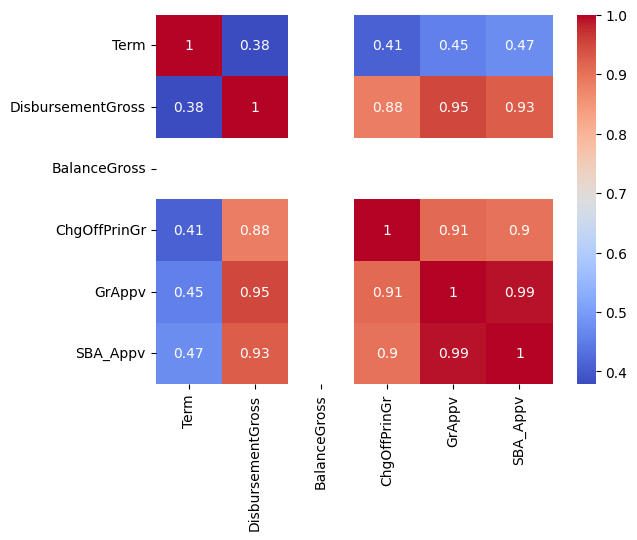

In [237]:
# Checking the correlation between Loan Financials
sns.heatmap(df[['Term', 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].corr(), annot=True, cmap='coolwarm')

SBA_Appv, GrAppv and DisbursementGross are highly correlated signalling same information being represented. Keepting the SBA approved ammount and dropping the Gross approved and disbursement gross.

In [238]:
# Calculate correlations between specified columns and 'MIS_Status'
columns_to_check = ['NewExist', 'City', 'SBA_Appv_log', 'DisbursementGross_log', 'ChgOffPrinGr_log', 'LowDoc', 'Sector']
correlations = df[columns_to_check + ['MIS_Status']].corr()['MIS_Status'].drop('MIS_Status')

correlations

NewExist                 0.026774
City                    -0.000122
SBA_Appv_log            -0.109168
DisbursementGross_log   -0.116075
ChgOffPrinGr_log        -0.164933
LowDoc                  -0.004323
Sector                  -0.004399
Name: MIS_Status, dtype: float64

In [239]:
df['MIS_Status'].value_counts()

MIS_Status
0    94551
1     2635
Name: count, dtype: int64

In [240]:
df = df.drop(columns=['LoanNr_ChkDgt','ChgOffDate'])
# better to drop GrAppv column as highly corelated
df.drop('GrAppv', axis=1, inplace=True)

In [241]:
# Define features (X) and target (y)
X = df.drop(['MIS_Status','ApprovalDate', 'DisbursementDate'], axis=1)
y = df['MIS_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [242]:
# Scale numerical features
scaler = StandardScaler()
numerical_cols = X_train.select_dtypes(include=['number']).columns

# Replace infinite values with NaN
X_train[numerical_cols] = X_train[numerical_cols].replace([np.inf, -np.inf], np.nan)
# Impute NaN values with the median
X_train[numerical_cols] = X_train[numerical_cols].fillna(X_train[numerical_cols].median())
X_train1 = X_train.copy()
# Fit and transform after handling infinite and missing values
X_train1[numerical_cols] = scaler.fit_transform(X_train1[numerical_cols])

# Now, transform X_test using the same scaler
# Replace infinite values with NaN in X_test
X_test[numerical_cols] = X_test[numerical_cols].replace([np.inf, -np.inf], np.nan)
# Impute NaN values with the median in X_test
X_test[numerical_cols] = X_test[numerical_cols].fillna(X_test[numerical_cols].median())
X_test1 = X_test.copy()
# Transform the numerical features in X_test
X_test1[numerical_cols] = scaler.transform(X_test1[numerical_cols])

In [243]:
# Initialize and train the decision tree model
dt_classifier = DecisionTreeClassifier(criterion= 'entropy', max_depth= 20, min_samples_split= 10)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

print(classification_report(y_test, y_pred_dt))

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Confusion Matrix:")
pd.crosstab(y_test, y_pred_dt, rownames=['True'], colnames=['Predicted'])

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=10)

Decision Tree Accuracy: 0.9547278526597387
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     18914
           1       0.07      0.06      0.07       524

    accuracy                           0.95     19438
   macro avg       0.52      0.52      0.52     19438
weighted avg       0.95      0.95      0.95     19438

Decision Tree Confusion Matrix:


Predicted,0,1
True,,
0,18527,387
1,493,31


In [244]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train1, y_train)

# Check the class distribution after oversampling
print(y_train_resampled.value_counts())

MIS_Status
1    75637
0    75637
Name: count, dtype: int64


In [245]:
# Initialize and train the logistic regression model
logreg = LogisticRegression(C= 10, penalty='l1', solver='liblinear')
# logreg.fit(X_resampled, y_resampled)
logreg.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = logreg.predict(X_test1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'])

LogisticRegression(C=10, penalty='l1', solver='liblinear')

Accuracy: 0.7415371951846897
              precision    recall  f1-score   support

           0       0.99      0.74      0.85     18914
           1       0.07      0.69      0.13       524

    accuracy                           0.74     19438
   macro avg       0.53      0.72      0.49     19438
weighted avg       0.96      0.74      0.83     19438

Confusion Matrix:


Predicted,0,1
True,,
0,14052,4862
1,162,362


In [247]:
# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(max_depth= None, min_samples_split=2, n_estimators= 200)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test1)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

print(classification_report(y_test, y_pred_rf))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:")
pd.crosstab(y_test, y_pred_rf, rownames=['True'], colnames=['Predicted'])

RandomForestClassifier(n_estimators=200)

Random Forest Accuracy: 0.9724251466200227
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18914
           1       0.17      0.01      0.01       524

    accuracy                           0.97     19438
   macro avg       0.57      0.50      0.50     19438
weighted avg       0.95      0.97      0.96     19438

Random Forest Confusion Matrix:


Predicted,0,1
True,,
0,18899,15
1,521,3


In [248]:
# Initialize and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 7, n_estimators= 50)
gb_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_gb = gb_classifier.predict(X_test1)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb}")

print(classification_report(y_test, y_pred_gb))

conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print("Gradient Boosting Confusion Matrix:")
pd.crosstab(y_test, y_pred_gb, rownames=['True'], colnames=['Predicted'])

GradientBoostingClassifier(max_depth=7, n_estimators=50)

Gradient Boosting Accuracy: 0.9704187673628974
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18914
           1       0.20      0.03      0.06       524

    accuracy                           0.97     19438
   macro avg       0.59      0.51      0.52     19438
weighted avg       0.95      0.97      0.96     19438

Gradient Boosting Confusion Matrix:


Predicted,0,1
True,,
0,18846,68
1,507,17


<Figure size 1000x800 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curves of Different Models')

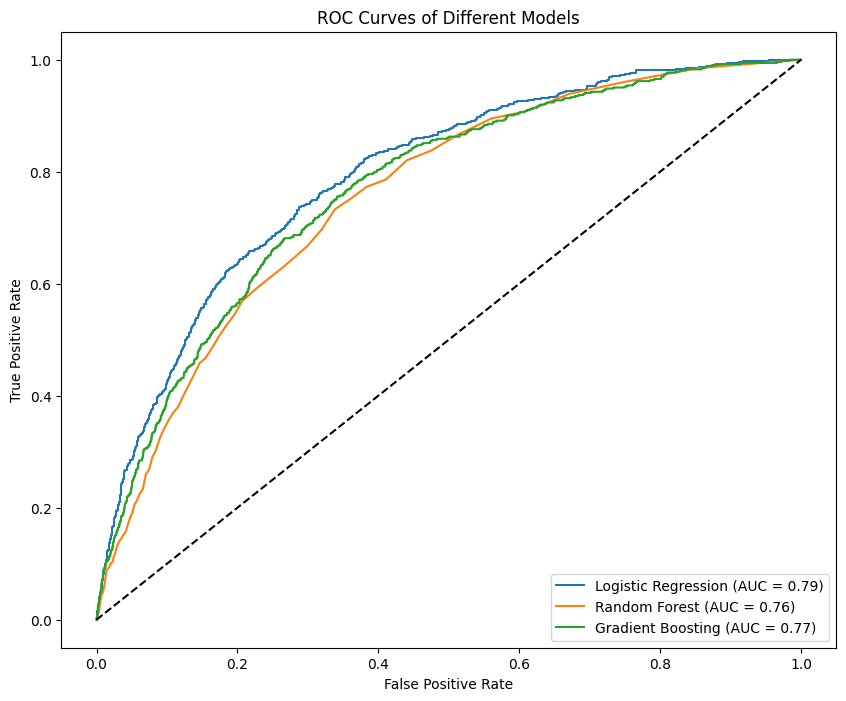

In [249]:
models = {
    'Logistic Regression': logreg,
    'Random Forest': rf_classifier,
    'Gradient Boosting': gb_classifier
}

plt.figure(figsize=(10, 8))

for name, model in models.items():
    y_pred_prob = model.predict_proba(X_test1)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of Different Models')
plt.legend(loc='lower right')
plt.show()

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve for Decision Tree Model')

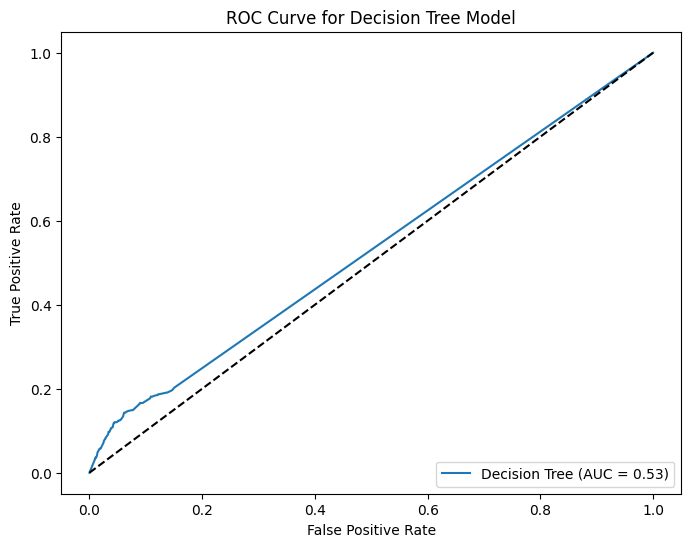

In [250]:
# Calculate predicted probabilities for the decision tree model
y_pred_prob_dt = dt_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for the decision tree model
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot the ROC curve for the decision tree model
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Model')
plt.legend(loc='lower right')
plt.show()

In [251]:
# from sklearn.model_selection import GridSearchCV

# # Define parameter grids for each model
# param_grids = {
#     'Logistic Regression': {
#         'C': [0.1, 1, 10],
#         'penalty': ['l1', 'l2'],
#         'solver': ['liblinear', 'saga']
#     },
#     'Random Forest': {
#         'n_estimators': [50, 100, 200],
#         'max_depth': [None, 10, 20],
#         'min_samples_split': [2, 5, 10]
#     },
#     'Gradient Boosting': {
#         'n_estimators': [50, 100, 200],
#         'learning_rate': [0.01, 0.1, 1],
#         'max_depth': [3, 5, 7]
#     },
#     'Decision Tree': {
#         'max_depth': [None, 10, 20],
#         'min_samples_split': [2, 5, 10],
#         'criterion': ['gini', 'entropy']
#     }
# }

# # Perform GridSearchCV for each model
# best_models = {}
# for name, model in models.items():
#     if name in param_grids:
#         grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='roc_auc', n_jobs=-1)
#         grid_search.fit(X_train_resampled, y_train_resampled)
#         best_models[name] = grid_search.best_estimator_
#         print(f"Best parameters for {name}: {grid_search.best_params_}")
#         print(f"Best AUC for {name}: {grid_search.best_score_}")
#     else:
#         best_models[name] = model
#         print(f"No hyperparameter tuning for {name}")

# # Evaluate best models on validation set
# plt.figure(figsize=(10, 8))

# for name, model in best_models.items():
#     y_pred_prob = model.predict_proba(X_test)[:, 1]
#     fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
#     roc_auc = auc(fpr, tpr)
#     plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curves of Best Models (Validation Set)')
# plt.legend(loc='lower right')
# plt.show()